## Dynamic Multipliers

This notebook reproduces figures 1.1 through 1.4 in James Hamilton's _Time Series Analysis_, which illustrate dynamic multipliers and difference equations.  See the book for details.

### First Order Difference Equations

This is a first order difference equation:

$$
y_{t} = \phi y_{t-1} + w_{t}
$$

So
$$
y_{0} = \phi y_{-1} + w_{0}
$$
and
$$
y_{1} = \phi y_{0} + w_{1} = \phi (\phi y_{-1} + w_{0}) + w_{1} = \phi^{2} y_{-1} + \phi w_{0} + w_{1}
$$
etc.  More generally:
$$
y_{t + j} = \phi^{j+1} y_{t-1} + \phi^{j} w_{t} + \phi^{j-1} w_{t+1} \dots + \phi w_{t+j-1} + w_{t+j}
$$

If there were a change to w_t without a change to any other w, the effect on the following y's is given by:

$$
\frac {\partial y_{t+j}}{\partial w_{t}} = \phi^{j}
$$

This quantity is called the _dynamic multiplier_.  

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

df = pd.DataFrame([[j,0.8 ** j] for j in range(1,25)],
                  columns=('j', 'phi'))

df['phi2'] = [(-0.8) ** j for j in range(1, 25)]
df['phi3'] = [(1.1) ** j for j in range(1, 25)]
df['phi4'] = [(-1.1) ** j for j in range(1, 25)]

/Users/mikemull/anaconda/envs/hamilton/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


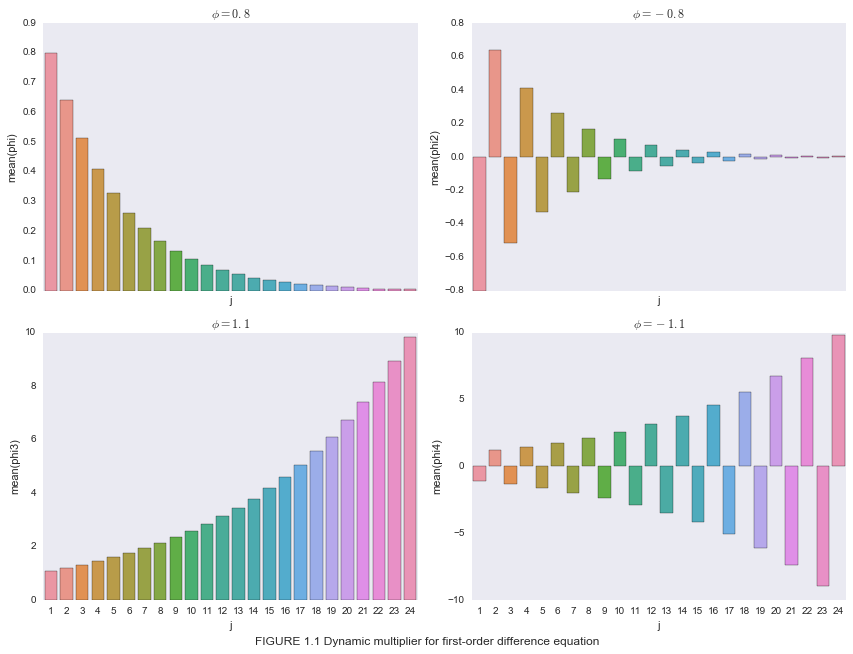

In [2]:
import matplotlib.pyplot as plt

sns.set(style="dark")

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=True)

axes[0][0].set_title(r'$\phi = 0.8$')
g = sns.barplot(x='j', y='phi', data=df, ax=axes[0][0])
axes[0][1].set_title(r'$\phi = -0.8$')
g = sns.barplot(x='j', y='phi2', data=df, ax=axes[0][1])
axes[1][0].set_title(r'$\phi = 1.1$')
g = sns.barplot(x='j', y='phi3', data=df, ax=axes[1][0])
axes[1][1].set_title(r'$\phi = -1.1$')
g = sns.barplot(x='j', y='phi4', data=df, ax=axes[1][1])

_=f.suptitle("FIGURE 1.1 Dynamic multiplier for first-order difference equation", y=0.01)
f.tight_layout()

### Impulse-Response Functions

Dynamic multiplier:
$$
\frac {\partial y_{t+j}}{\partial w_{t}} = \phi^{j}
$$


>Because the dynamic multiplier calculates the response of y to a single impulse in w, it is also referred
>to as the _impulse-response_ function (Hamilton, page 5)

In [3]:
phi = 0.8
w = [1.0 if t==6 else 0.0 for t in range(20)]
y = [0] * 20
for t in range(1,20):
    y[t] = phi * y[t-1] + w[t]
df = pd.DataFrame({'t': range(20), 'w': w, 'y': y})

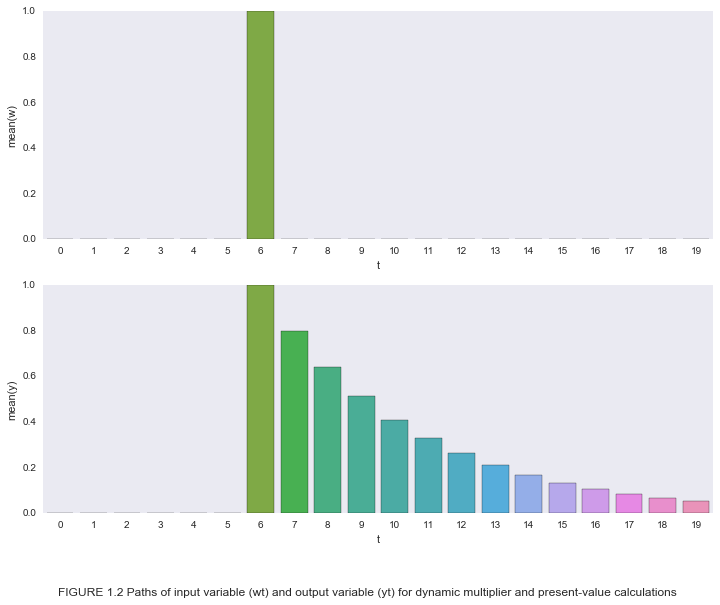

In [4]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharey=True)

g = sns.barplot(x='t', y='w', data=df, ax=ax1)
g = sns.barplot(x='t', y='y', data=df, ax=ax2)

_=f.suptitle("FIGURE 1.2 Paths of input variable (wt) and output variable (yt) for dynamic multiplier and \
present-value calculations", y=0.01)

In [5]:
phi = 0.8
w = [1.0 if t >= 6 else 0.0 for t in range(20)]
y = [0] * 20
for t in range(1,20):
    y[t] = phi * y[t-1] + w[t]
df = pd.DataFrame({'t': range(20), 'w': w, 'y': y})

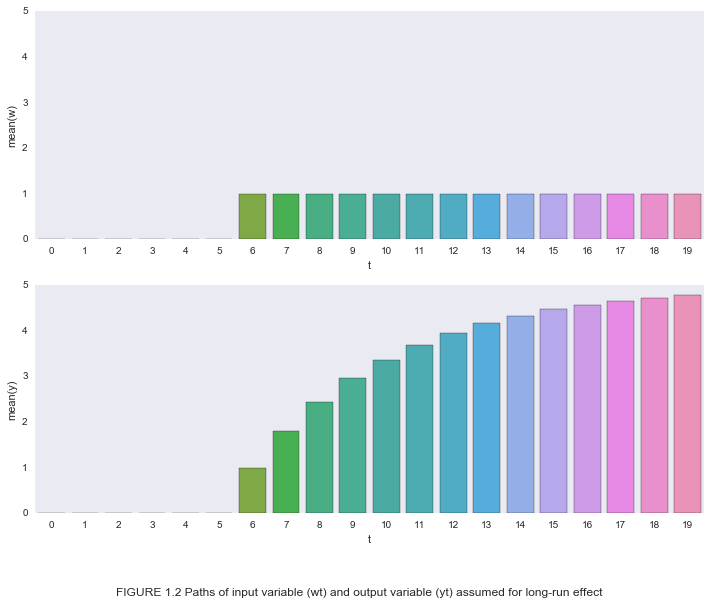

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharey=True)

g = sns.barplot(x='t', y='w', data=df, ax=ax1)
g = sns.barplot(x='t', y='y', data=df, ax=ax2)

_=f.suptitle("FIGURE 1.2 Paths of input variable (wt) and output variable (yt) assumed for long-run effect", y=0.01)

### Second Order Difference Equations

$$
\xi_t = F\xi_{t-1} + v_t
$$

For p=2

$$
\begin{align}
   \begin{bmatrix} y_{t} \\ y_{t-1} \end{bmatrix} & = \begin{bmatrix}
      \phi_1 & \phi_2 \\
           1 &      0
   \end{bmatrix} \begin{bmatrix} y_{t-1} \\ y_{t-2} \end{bmatrix} + \begin{bmatrix} w_t \\ 0 \end{bmatrix}
\end{align}
$$


$$
\frac {\partial y_{t+j}}{\partial w_{t}} = f_{11}^{(j)}
$$

>Proposition 1.2: _If the eignevalues (&lambda;<sub>1</sub>, ...&lambda;<sub>p</sub>) of the matrix F in [1.2.3] are distinct, then the magnitude c<sub>i</sub> in [1.2.21] can be written (Hamilton, page 12):

$$
c_i = \frac{\lambda_i^{p-1}}{\prod\limits_{k=1}^{p}(\lambda_i - \lambda_k)}
$$

> For example, consider the following second-order difference equation:

$$
y_t = 0.6y_{t-1} + 0.2y_{t-2} + w_t
$$

In [7]:
l1, l2 = np.roots([1.0, -0.6, -0.2])

In [8]:
c1 = l1 / (l1 - l2)
c2 = l2 / (l2 - l1)
c1, c2

(0.7785430072655779, 0.22145699273442226)

In [9]:
y = [0] * 20
for t in range(1,20):
    y[t] = c1 * l1 ** (t - 1) + c2 * l2 ** (t - 1)
df = pd.DataFrame({'t': range(20), 'y': y})

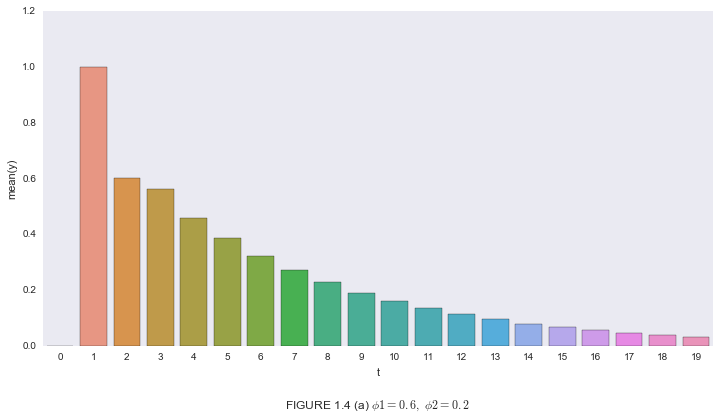

In [10]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='t', y='y', data=df)
_=plt.title(r'FIGURE 1.4 (a) $\phi1 = 0.6,$ $\phi2 = 0.2$', x=0.5, y=-0.2)

> Other interesting possibilities arise if some of the eigenvalues are complex

In [11]:
l1, l2 = np.roots([1.0, -0.5, 0.8])

In [12]:
l1, l2

((0.25+0.85877820186588349j), (0.25-0.85877820186588349j))

In [13]:
c1i = l1 / (l1 - l2)
c2i = l2 / (l2 - l1)
c1i, c2i

((0.5-0.14555562743489547j), (0.5+0.14555562743489547j))

In [14]:
r = np.abs(l1)
alpha = np.real(c1i)
beta = np.imag(c1i)
theta = np.arccos(np.real(l1) / r)
r, alpha, beta, theta

(0.89442719099991597,
 array(0.5),
 array(-0.14555562743489547),
 1.2875141614843575)

In [15]:
y = [0] * 20
for t in range(1,20):
    y[t] = 2 * alpha * r ** (t - 1) * np.cos(theta * (t - 1)) - 2 * beta * r ** (t - 1) * np.sin(theta * (t - 1))
df = pd.DataFrame({'t': range(20), 'y': y})

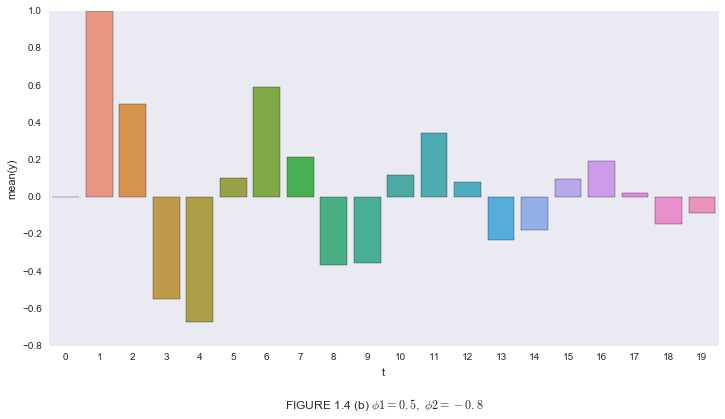

In [16]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='t', y='y', data=df)
_=plt.title(r'FIGURE 1.4 (b) $\phi1 = 0.5,$ $\phi2 = -0.8$', x=0.5, y=-0.2)